<a href="https://colab.research.google.com/github/milad-s5/DL_HW2/blob/Q1/DL_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic reconnect to runtime

In [ ]:
#This cell runs JS code to automatic reconnect to runtime:

import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


# load dataset and import libs

In [ ]:
import sys
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D , BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#confusion_mtx
from numpy import expand_dims
import pandas as pd
import seaborn as sn
#vgg
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
import tensorflow_datasets as tfds

In [ ]:
(x_train  , y_train) , (x_test , y_test)  = cifar10.load_data()          

# Display 10 images with their labels

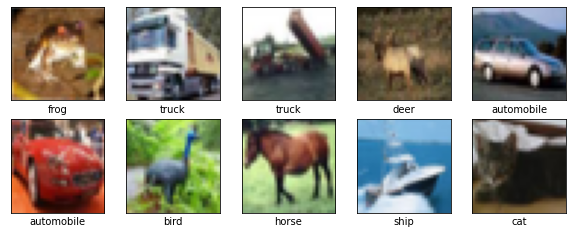

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num_classes = 10 # or = len(np.unique(y_train))

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Preprocessing

In [ ]:
# train and test data with normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# Train,Test,Valid,One Hot
num_valid = int(0.2*x_train.shape[0])
num_train = x_train.shape[0]-num_valid

x_valid = x_train[num_train:]
y_valid = y_train[num_train:]

x_train = x_train[0:num_train]
y_train = y_train[0:num_train]

# one-hot encode the labels
y_train_hot = to_categorical(y_train, num_classes)
y_valid_hot = to_categorical(y_valid, num_classes)
y_test_hot = to_categorical(y_test, num_classes)

In [ ]:
# check shape 
print('x_train:\t {}'.format(x_train.shape))
print('y_train:\t {}'.format(y_train.shape))
print('y_train_hot:\t {}\n'.format(y_train_hot.shape))

print('x_valid:\t {}'.format(x_valid.shape))
print('y_valid:\t {}'.format(y_valid.shape))
print('y_valid_hot:\t {}\n'.format(y_valid_hot.shape))

print('x_test:\t\t {}'.format(x_test.shape))
print('y_test:\t\t {}'.format(y_test.shape))
print('y_test_hot:\t {}'.format(y_test_hot.shape))

x_train:	 (40000, 32, 32, 3)
y_train:	 (40000, 1)
y_train_hot:	 (40000, 10)

x_valid:	 (10000, 32, 32, 3)
y_valid:	 (10000, 1)
y_valid_hot:	 (10000, 10)

x_test:		 (10000, 32, 32, 3)
y_test:		 (10000, 1)
y_test_hot:	 (10000, 10)


In [ ]:
x_train_shuffle = tf.random.shuffle(x_train, seed=10)
y_train_shuffle = tf.random.shuffle(y_train, seed=10)

# MLP

In [ ]:
def plot_curves(history):
	# plot loss
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], label='train')
	plt.plot(history.history['val_loss'], label='test')
	plt.show()
	# plot accuracy
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], label='train')
	plt.plot(history.history['val_accuracy'], label='test')
	plt.show()

Epoch 1/100
1250/1250 [==============================] - 6s 4ms/step - loss: 1.9466 - accuracy: 0.2979 - val_loss: 1.8534 - val_accuracy: 0.3369
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8189 - accuracy: 0.3507 - val_loss: 1.8361 - val_accuracy: 0.3515
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7762 - accuracy: 0.3657 - val_loss: 1.8065 - val_accuracy: 0.3566
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7595 - accuracy: 0.3718 - val_loss: 1.7632 - val_accuracy: 0.3793
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7394 - accuracy: 0.3802 - val_loss: 1.7588 - val_accuracy: 0.3700
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7226 - accuracy: 0.3862 - val_loss: 1.7917 - val_accuracy: 0.3515
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7110 - accuracy: 0.3866 - val_loss: 1.7634 - val_ac

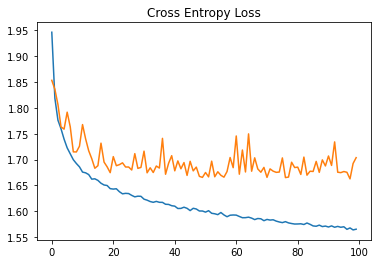

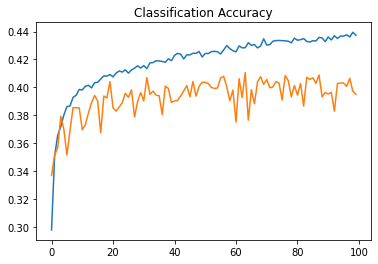

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

Epoch 1/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9020 - accuracy: 0.3226 - val_loss: 1.7899 - val_accuracy: 0.3710
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7303 - accuracy: 0.3921 - val_loss: 1.7155 - val_accuracy: 0.3997
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6635 - accuracy: 0.4129 - val_loss: 1.6755 - val_accuracy: 0.4126
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6134 - accuracy: 0.4326 - val_loss: 1.6639 - val_accuracy: 0.4178
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5762 - accuracy: 0.4454 - val_loss: 1.6230 - val_accuracy: 0.4336
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5417 - accuracy: 0.4580 - val_loss: 1.5959 - val_accuracy: 0.4404
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5192 - accuracy: 0.4654 - val_loss: 1.5691 - val_ac

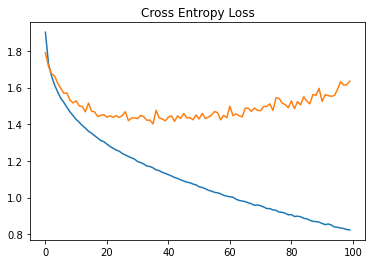

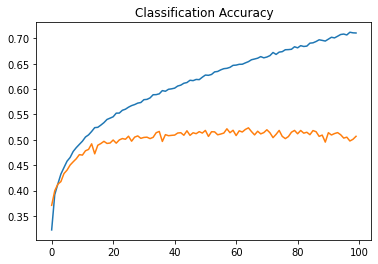

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

## a. Stochastic mini batch based (Minibatch Gradient Descent)

### Batch_size=32

Epoch 1/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6630 - accuracy: 0.4143 - val_loss: 1.6695 - val_accuracy: 0.4185
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6141 - accuracy: 0.4329 - val_loss: 1.6266 - val_accuracy: 0.4271
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5732 - accuracy: 0.4478 - val_loss: 1.6137 - val_accuracy: 0.4359
Epoch 4/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.5464 - accuracy: 0.4557 - val_loss: 1.6139 - val_accuracy: 0.4315
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5173 - accuracy: 0.4661 - val_loss: 1.5691 - val_accuracy: 0.4470
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4931 - accuracy: 0.4763 - val_loss: 1.5865 - val_accuracy: 0.4441
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4726 - accuracy: 0.4825 - val_loss: 1.5189 - val_ac

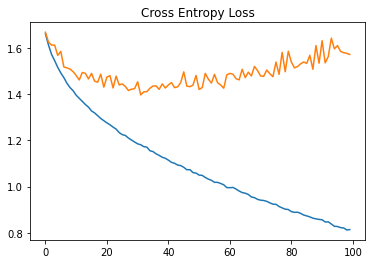

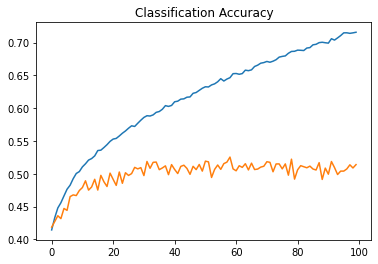

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=32, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

### Batch_size=64

Epoch 1/100
625/625 [==============================] - 4s 5ms/step - loss: 1.9481 - accuracy: 0.3043 - val_loss: 1.8443 - val_accuracy: 0.3580
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7820 - accuracy: 0.3737 - val_loss: 1.7696 - val_accuracy: 0.3855
Epoch 3/100
625/625 [==============================] - 3s 6ms/step - loss: 1.7199 - accuracy: 0.3961 - val_loss: 1.7201 - val_accuracy: 0.3943
Epoch 4/100
625/625 [==============================] - 3s 6ms/step - loss: 1.6705 - accuracy: 0.4142 - val_loss: 1.6930 - val_accuracy: 0.4145
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6334 - accuracy: 0.4279 - val_loss: 1.6647 - val_accuracy: 0.4179
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6058 - accuracy: 0.4381 - val_loss: 1.6506 - val_accuracy: 0.4211
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 1.5805 - accuracy: 0.4471 - val_loss: 1.6249 - val_accuracy: 0.4347

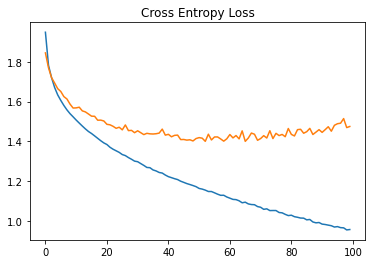

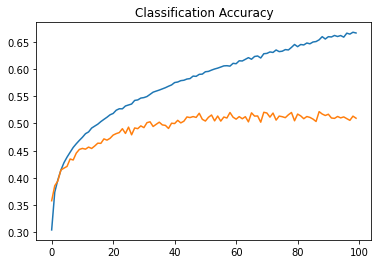

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=64, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

### Batch_size=256

Epoch 1/150
157/157 [==============================] - 3s 15ms/step - loss: 2.1054 - accuracy: 0.2462 - val_loss: 1.9858 - val_accuracy: 0.2963
Epoch 2/150
157/157 [==============================] - 2s 14ms/step - loss: 1.9305 - accuracy: 0.3279 - val_loss: 1.9102 - val_accuracy: 0.3320
Epoch 3/150
157/157 [==============================] - 2s 15ms/step - loss: 1.8677 - accuracy: 0.3504 - val_loss: 1.8638 - val_accuracy: 0.3496
Epoch 4/150
157/157 [==============================] - 2s 14ms/step - loss: 1.8281 - accuracy: 0.3665 - val_loss: 1.8349 - val_accuracy: 0.3625
Epoch 5/150
157/157 [==============================] - 2s 14ms/step - loss: 1.7994 - accuracy: 0.3783 - val_loss: 1.8125 - val_accuracy: 0.3731
Epoch 6/150
157/157 [==============================] - 2s 14ms/step - loss: 1.7760 - accuracy: 0.3874 - val_loss: 1.7955 - val_accuracy: 0.3794
Epoch 7/150
157/157 [==============================] - 2s 14ms/step - loss: 1.7560 - accuracy: 0.3937 - val_loss: 1.7791 - val_accuracy:

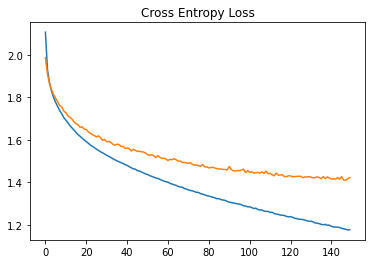

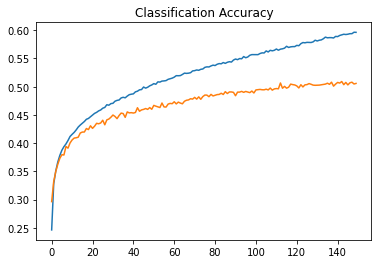

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 150, batch_size=256, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

## b. Change activation functions

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'elu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=64, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

Epoch 1/100
625/625 [==============================] - 5s 7ms/step - loss: 1.9493 - accuracy: 0.3061 - val_loss: 1.8685 - val_accuracy: 0.3380
Epoch 2/100
625/625 [==============================] - 4s 7ms/step - loss: 1.8004 - accuracy: 0.3707 - val_loss: 1.7935 - val_accuracy: 0.3738
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 1.7470 - accuracy: 0.3903 - val_loss: 1.7457 - val_accuracy: 0.4013
Epoch 4/100
625/625 [==============================] - 4s 7ms/step - loss: 1.7054 - accuracy: 0.4063 - val_loss: 1.7385 - val_accuracy: 0.4008
Epoch 5/100
625/625 [==============================] - 4s 6ms/step - loss: 1.6682 - accuracy: 0.4221 - val_loss: 1.7005 - val_accuracy: 0.4095
Epoch 6/100
625/625 [==============================] - 4s 7ms/step - loss: 1.6359 - accuracy: 0.4299 - val_loss: 1.6833 - val_accuracy: 0.4151
Epoch 7/100
625/625 [==============================] - 4s 7ms/step - loss: 1.6098 - accuracy: 0.4391 - val_loss: 1.6366 - val_accuracy: 0.4354

### Confusion matrix

Text(0.5, 69.0, 'Predictions')

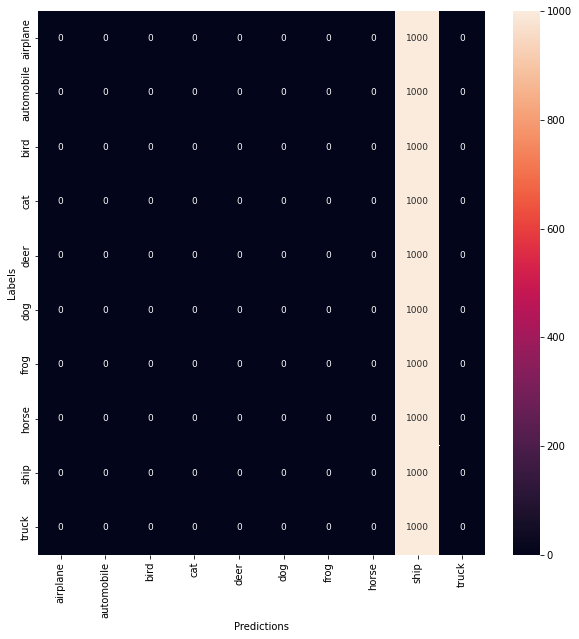

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

In [ ]:
model = Sequential()    # actually tf.keras.models.Sequential

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128, activation = 'tanh'))     
model.add(Dense(10, activation = 'tanh'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=32, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

## c. Change loss function

In [ ]:
# MSE
# categorical_hinge

# CNN

## Add CNN layers

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
625/625 [==============================] - 45s 70ms/step - loss: 1.7093 - accuracy: 0.3848 - val_loss: 1.4219 - val_accuracy: 0.5053
Epoch 2/50
625/625 [==============================] - 43s 69ms/step - loss: 1.3133 - accuracy: 0.5315 - val_loss: 1.2364 - val_accuracy: 0.5545
Epoch 3/50
625/625 [==============================] - 44s 70ms/step - loss: 1.1088 - accuracy: 0.6070 - val_loss: 1.1730 - val_accuracy: 0.5892
Epoch 4/50
625/625 [==============================] - 46s 74ms/step - loss: 0.9488 - accuracy: 0.6679 - val_loss: 1.0810 - val_accuracy: 0.6263
Epoch 5/50
625/625 [==============================] - 44s 70ms/step - loss: 0.7979 - accuracy: 0.7220 - val_loss: 1.0222 - val_accuracy: 0.6486
Epoch 6/50
625/625 [==============================] - 44s 70ms/step - loss: 0.6332 - accuracy: 0.7834 - val_loss: 1.0388 - val_accuracy: 0.6446
Epoch 7/50
625/625 [==============================] - 46s 74ms/step - loss: 0.4569 - accuracy: 0.8409 - val_loss: 1.1048 - val_accuracy:

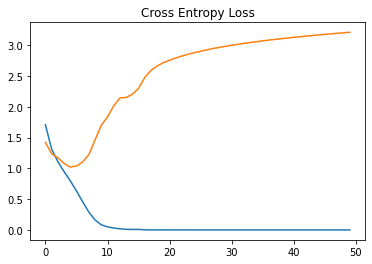

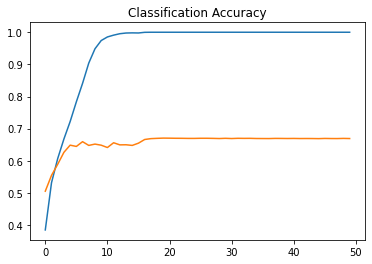

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	#model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	#model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	#model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	#model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# define model
model = define_model()
# fit model
history = model.fit(x_train, y_train_hot, epochs=50, batch_size=64, validation_data=(x_valid, y_valid_hot), verbose=1)
# evaluate model
print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)
# learning curves
plot_curves(history)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
625/625 [==============================] - 15s 22ms/step - loss: 1.8364 - accuracy: 0.3376 - val_loss: 1.5533 - val_accuracy: 0.4357
Epoch 2/50
625/625 [==============================] - 13s 21ms/step - loss: 1.4640 - accuracy: 0.4737 - val_loss: 1.4357 - val_accuracy: 0.4881
Epoch 3/50
625/625 [==============================] - 14s 22ms/step - loss: 1.3126 - accuracy: 0.5330 - val_loss: 1.2905 - val_accuracy: 0.5380
Epoch 4/50
625/625 [==============================] - 13s 21ms/step - loss: 1.1925 - accuracy: 0.5768 - val_loss: 1.1989 - val_accuracy: 0.5761
Epoch 5/50
625/625 [==============================] - 13s 21ms/step - loss: 1.0974 - accuracy: 0.6136 - val_loss: 1.1423 - val_accuracy: 0.5970
Epoch 6/50
625/625 [==============================] - 14s 22ms/step - loss: 1.0121 - accuracy: 0.6435 - val_loss: 1.0566 - val_accuracy: 0.6329
Epoch 7/50
625/625 [==============================] - 13s 21ms/step - loss: 0.9356 - accuracy: 0.6728 - val_loss: 1.0760 - val_accuracy:

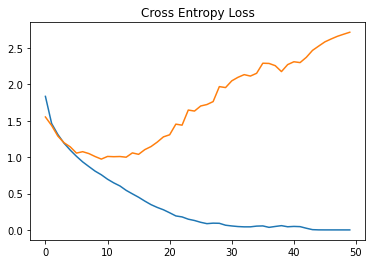

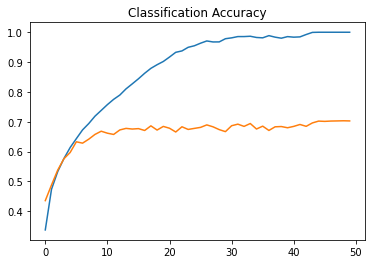

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	#model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# define model
model = define_model()
# fit model
history = model.fit(x_train, y_train_hot, epochs=50, batch_size=64, validation_data=(x_valid, y_valid_hot), verbose=1)
# evaluate model
print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)
# learning curves
plot_curves(history)

## Add Batch normalization and Pooling layers

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
625/625 [==============================] - 17s 26ms/step - loss: 1.5054 - accuracy: 0.4641 - val_loss: 1.4147 - val_accuracy: 0.5040
Epoch 2/50
625/625 [==============================] - 16s 25ms/step - loss: 1.1014 - accuracy: 0.6041 - val_loss: 1.1667 - val_accuracy: 0.5863
Epoch 3/50
625/625 [==============================] - 16s 25ms/step - loss: 0.9146 - accuracy: 0.6765 - val_loss: 1.0509 - val_accuracy: 0.6238
Epoch 4/50
625/625 [==============================] - 16s 25ms/step - loss: 0.7844 - accuracy: 0.7226 - val_loss: 0.9884 - val_accuracy: 0.6584
Epoch 5/50
625/625 [==============================] - 16s 25ms/step - loss: 0.6714 - accuracy: 0.7653 - val_loss: 0.9352 - val_accuracy: 0.6786
Epoch 6/50
625/625 [==============================] - 15s 25ms/step - loss: 0.5783 - accuracy: 0.7978 - val_loss: 0.9466 - val_accuracy: 0.6779
Epoch 7/50
625/625 [==============================] - 16s 25ms/step - loss: 0.4797 - accuracy: 0.8350 - val_loss: 0.9868 - val_accuracy:

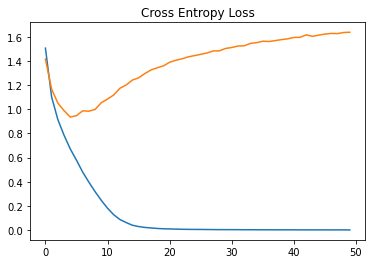

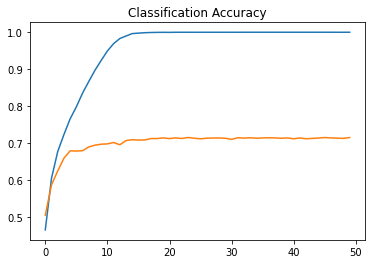

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	#model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model = define_model()

history = model.fit(x_train, y_train_hot, epochs=50, batch_size=64, validation_data=(x_valid, y_valid_hot), verbose=1)

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

## Add Drop out layer

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
625/625 [==============================] - 18s 27ms/step - loss: 1.8240 - accuracy: 0.3441 - val_loss: 1.4534 - val_accuracy: 0.4665
Epoch 2/100
625/625 [==============================] - 16s 25ms/step - loss: 1.4655 - accuracy: 0.4627 - val_loss: 1.4829 - val_accuracy: 0.4705
Epoch 3/100
625/625 [==============================] - 16s 26ms/step - loss: 1.3323 - accuracy: 0.5156 - val_loss: 1.2003 - val_accuracy: 0.5635
Epoch 4/100
625/625 [==============================] - 16s 25ms/step - loss: 1.2390 - accuracy: 0.5530 - val_loss: 1.1282 - val_accuracy: 0.5951
Epoch 5/100
625/625 [==============================] - 16s 25ms/step - loss: 1.1609 - accuracy: 0.5813 - val_loss: 1.0681 - val_accuracy: 0.6176
Epoch 6/100
625/625 [==============================] - 16s 26ms/step - loss: 1.0996 - accuracy: 0.6050 - val_loss: 1.0769 - val_accuracy: 0.6139
Epoch 7/100
625/625 [==============================] - 16s 26ms/step - loss: 1.0403 - accuracy: 0.6248 - val_loss: 0.9990 - val_ac

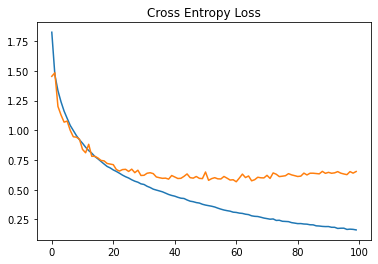

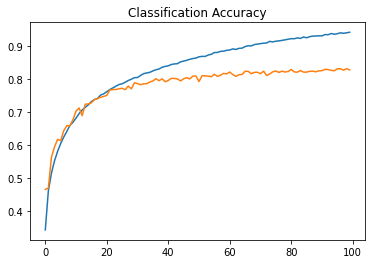

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model = define_model()

history = model.fit(x_train, y_train_hot, epochs=100, batch_size=64, validation_data=(x_valid, y_valid_hot), verbose=1)

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

# Data Augmentation

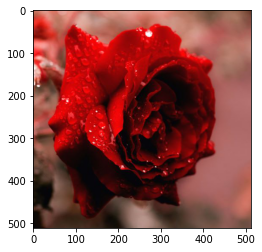

In [ ]:
image = img.imread('test.jpg')
# displaying the image
plt.imshow(image)

## Ten artificial examples

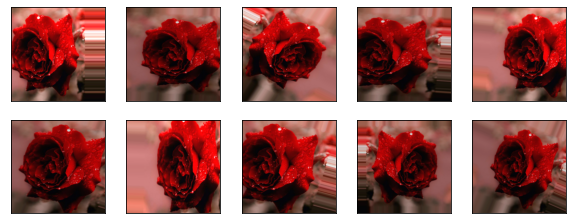

In [ ]:
# ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=30,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.8,1.2])  # brightness
image_exp = expand_dims(image, 0)
# iterator
aug_iter = datagen.flow(image_exp, batch_size=1)


# generate batch of images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = next(aug_iter)[0].astype('uint8')
    plt.imshow(image)
    # The CIFAR labels happen to be arrays, which is why you need the extra index
plt.show()

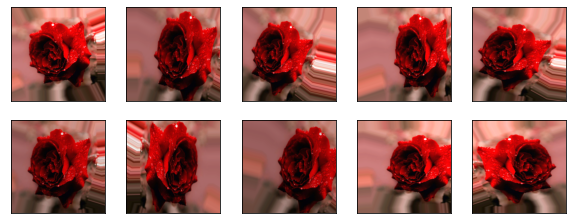

In [ ]:
# ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=30,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.8,1.2])  # brightness
image_exp = expand_dims(image, 0)
# iterator
aug_iter = datagen.flow(image_exp, batch_size=1)


# generate batch of images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = next(aug_iter)[0].astype('uint8')
    plt.imshow(image)
    # The CIFAR labels happen to be arrays, which is why you need the extra index
plt.show()

In [ ]:
datagen.fit(image.reshape(1,511,512,3))
image.shape

(511, 512, 3)

## Delete 90 percent of dogs and cats classes

In [ ]:
(x_train  , y_train) , (x_test , y_test)  = tf.keras.datasets.cifar10.load_data()   
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = 10

In [ ]:
b = 500

a = (y_train == 3).reshape(-1,) #cat
np.random.seed(0)
rnd_indices = np.random.choice(x_train[a].shape[0], size=b, replace=False)
x_train = np.concatenate((x_train[~a], x_train[a][rnd_indices]), axis=0) # new x_train
y_train = np.concatenate((y_train[~a], y_train[a][rnd_indices]), axis=0) # new y_train

a = (y_train == 5).reshape(-1,) #dog
rnd_indices = np.random.choice(x_train[a].shape[0], size=b, replace=False)
x_train = np.concatenate((x_train[~a], x_train[a][rnd_indices]), axis=0) # new x_train
y_train = np.concatenate((y_train[~a], y_train[a][rnd_indices]), axis=0) # new y_train

num_train = x_train.shape[0]

In [ ]:
# check shape 
print('x_train:\t {}'.format(x_train.shape))
print('y_train:\t {}'.format(y_train.shape))

x_train:	 (41000, 32, 32, 3)
y_train:	 (41000, 1)


In [ ]:
# train and test data with normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# Train,Test,Valid,One Hot
num_valid = int(0.2*x_train.shape[0])
num_train = x_train.shape[0]-num_valid

x_valid = x_train[num_train:]
y_valid = y_train[num_train:]

x_train = x_train[0:num_train]
y_train = y_train[0:num_train]

# one-hot encode the labels
y_train_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_valid_hot = tf.keras.utils.to_categorical(y_valid, num_classes)
y_test_hot = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# check final shape 
print('x_train:\t {}'.format(x_train.shape))
print('y_train:\t {}'.format(y_train.shape))
print('y_train_hot:\t {}\n'.format(y_train_hot.shape))

print('x_valid:\t {}'.format(x_valid.shape))
print('y_valid:\t {}'.format(y_valid.shape))
print('y_valid_hot:\t {}\n'.format(y_valid_hot.shape))

print('x_test:\t\t {}'.format(x_test.shape))
print('y_test:\t\t {}'.format(y_test.shape))
print('y_test_hot:\t {}'.format(y_test_hot.shape))

x_train:	 (32800, 32, 32, 3)
y_train:	 (32800, 1)
y_train_hot:	 (32800, 10)

x_valid:	 (8200, 32, 32, 3)
y_valid:	 (8200, 1)
y_valid_hot:	 (8200, 10)

x_test:		 (10000, 32, 32, 3)
y_test:		 (10000, 1)
y_test_hot:	 (10000, 10)


In [ ]:
x_train_shuffle = tf.random.shuffle(x_train, seed=10)
y_train_shuffle = tf.random.shuffle(y_train, seed=10)

## Train model

## Confusion matrix

## Data Augmentation (cats and dogs)

## Confusion matrix

# Extera 1

## VGG16

In [ ]:
# Implement vgg16
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

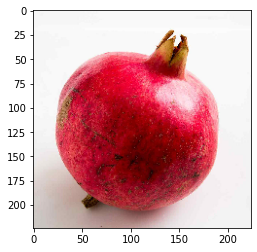

In [ ]:
image = load_img('anar.jpg', target_size=(224, 224))
plt.imshow(image)

image = tf.keras.preprocessing.image.img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

image = preprocess_input(image)
p = model.predict(image)
label = decode_predictions(p)

In [ ]:
# our labels
label[0][:3]

[('n07768694', 'pomegranate', 0.99127287),
 ('n07753113', 'fig', 0.0074562416),
 ('n07753592', 'banana', 0.0006549005)]

## Transfer learning on VGG16 model for two class dataset

In [ ]:
# two class = roses and sunflowers from tf_flowers dataset
## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
    "tf_flowers",
    split=["train[:70%]", "train[:30%]"], ## Train test split
    batch_size=-1,
    as_supervised=True,  # Include labels
)


a0 = (train_labels == 2).numpy().reshape(-1,) #roses
a1 = (train_labels == 3).numpy().reshape(-1,) #sunflowers
num_rose = train_ds[a0].shape[0]
num_sunflow = train_ds[a1].shape[0]
train_ds = np.concatenate((train_ds[a0], train_ds[a1]), axis=0) # new train_ds
train_labels = np.concatenate((train_labels[a0], train_labels[a1]), axis=0) - 2 # new train_labels

a00 = (test_labels == 2).numpy().reshape(-1,) #roses
a11 = (test_labels == 3).numpy().reshape(-1,) #sunflowers
test_ds = np.concatenate((test_ds[a00], test_ds[a11]), axis=0) # new test_ds
test_labels = np.concatenate((test_labels[a00], test_labels[a11]), axis=0) - 2 # new test_labels

## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=2)
test_labels = to_categorical(test_labels, num_classes=2)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [ ]:
# check shape 
print('x_train:\t {}'.format(train_ds.shape))
print('y_train:\t {}\n'.format(train_labels.shape))

print('x_test:\t\t {}'.format(test_ds.shape))
print('y_test:\t\t {}\n'.format(test_labels.shape))

print('Number of roses:\t {}'.format(num_rose))
print('Number of sunflowers:\t {}'.format(num_sunflow))

x_train:	 (1027, 150, 150, 3)
y_train:	 (1027, 2)

x_test:		 (429, 150, 150, 3)
y_test:		 (429, 2)

Number of roses:	 531
Number of sunflowers:	 496


In [ ]:
## Loading VGG16 model
# We use Include_top=False to remove the classification layer that was trained on the ImageNet dataset and set the model as not trainable
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape) 
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(train_ds) 
test_ds = preprocess_input(test_ds)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_ds, train_labels, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/10
26/26 [==============================] - 7s 228ms/step - loss: 0.1559 - accuracy: 0.9488 - val_loss: 0.5772 - val_accuracy: 0.9078
Epoch 2/10
26/26 [==============================] - 5s 212ms/step - loss: 0.0963 - accuracy: 0.9732 - val_loss: 1.5334 - val_accuracy: 0.8204
Epoch 3/10
26/26 [==============================] - 5s 212ms/step - loss: 0.0775 - accuracy: 0.9842 - val_loss: 0.7752 - val_accuracy: 0.9029
Epoch 4/10
26/26 [==============================] - 5s 211ms/step - loss: 0.0208 - accuracy: 0.9939 - val_loss: 1.8773 - val_accuracy: 0.8689
Epoch 5/10
26/26 [==============================] - 5s 212ms/step - loss: 0.0087 - accuracy: 0.9976 - val_loss: 1.6224 - val_accuracy: 0.8592
Epoch 6/10
26/26 [==============================] - 6s 213ms/step - loss: 0.0084 - accuracy: 0.9963 - val_loss: 1.6369 - val_accuracy: 0.8883


In [ ]:
model.evaluate(test_ds, test_labels)

14/14 [==============================] - 2s 164ms/step - loss: 0.1848 - accuracy: 0.9650


[0.18481914699077606, 0.9650349617004395]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


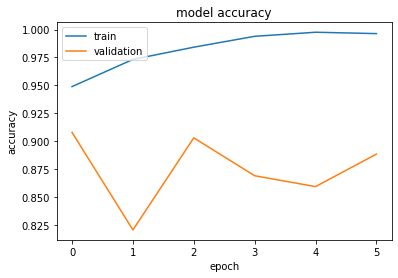

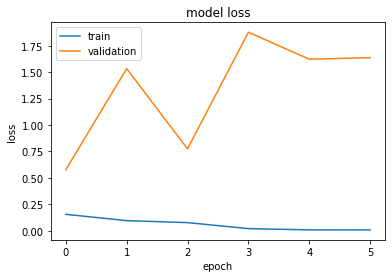

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Extera 2

In [ ]:
# Copyright (c) 2016 Artsiom Sanakoyeu

import numpy as np
"""
Person-Centric (PC) Annotations.
The canonical joint order for LSP dataset:
0 Head top
1 Neck
2 Right shoulder (from person's perspective)
3 Right elbow
4 Right wrist
5 Right hip
6 Right knee
7 Right ankle
8 Left shoulder
9 Left elbow
10 Left wrist
11 Left hip
12 Left knee
13 Left ankle
"""

NUM_JOINTS = 14
CANONICAL_JOINT_NAMES = ['Head', 'Neck', 'R Shoulder',
                         'R elbow', 'R wrist',
                         'R hip', 'R knee', 'R ankle',
                         'L shoulder', 'L elbow',
                         'L wrist', 'L hip',
                         'L knee', 'L ankle']


def joints2sticks(joints):
    """
    Args:
        joints: array of joints in the canonical order.
      The canonical joint order:
        0 Head top
        1 Neck
        2 Right shoulder (from person's perspective)
        3 Right elbow
        4 Right wrist
        5 Right hip
        6 Right knee
        7 Right ankle
        8 Left shoulder
        9 Left elbow
        10 Left wrist
        11 Left hip
        12 Left knee
        13 Left ankle
    Returns:
        sticks: array of sticks in the canonical order.
      The canonical part stick order:
        0 Head
        1 Torso
        2 Right Upper Arm
        3 Right Lower Arm
        4 Right Upper Leg
        5 Right Lower Leg
        6 Left Upper Arm
        7 Left Lower Arm
        8 Left Upper Leg
        9 Left Lower Leg
    """
    assert joints.shape == (14, 2)
    stick_n = 10  # number of stick
    sticks = np.zeros((stick_n, 4), dtype=np.float32)
    sticks[0, :] = np.hstack([joints[0, :], joints[1, :]])  # Head
    sticks[1, :] = np.hstack([(joints[2, :] + joints[8, :]) / 2.0,
                             (joints[5, :] + joints[11, :]) / 2.0])  # Torso
    sticks[2, :] = np.hstack([joints[2, :], joints[3, :]])  # Left U.arms
    sticks[3, :] = np.hstack([joints[3, :], joints[4, :]])  # Left L.arms
    sticks[4, :] = np.hstack([joints[5, :], joints[6, :]])  # Left U.legs
    sticks[5, :] = np.hstack([joints[6, :], joints[7, :]])  # Left L.legs
    sticks[6, :] = np.hstack([joints[8, :], joints[9, :]])  # Right U.arms
    sticks[7, :] = np.hstack([joints[9, :], joints[10, :]])  # Right L.arms
    sticks[8, :] = np.hstack([joints[11, :], joints[12, :]])  # Right U.legs
    sticks[9, :] = np.hstack([joints[12, :], joints[13, :]])  # Right L.legs
    return sticks


def convert2canonical(joints):
    """
    Convert joints to evaluation structure.
    Permute joints according to the canonical joint order.
    """
    assert joints.shape[1:] == (14, 2), 'LSP must contain 14 joints per person'
    # convert to the canonical joint order
    joint_order = [13,  # Head top
                   12,  # Neck
                   8,   # Right shoulder
                   7,   # Right elbow
                   6,   # Right wrist
                   2,   # Right hip
                   1,   # Right knee
                   0,   # Right ankle
                   9,   # Left shoulder
                   10,  # Left elbow
                   11,  # Left wrist
                   3,   # Left hip
                   4,   # Left knee
                   5]   # Left ankle
    canonical = [dict() for _ in xrange(joints.shape[0])]
    for i in xrange(joints.shape[0]):
        canonical[i]['joints'] = joints[i, joint_order, :]
        canonical[i]['sticks'] = joints2sticks(canonical[i]['joints'])
    return canonical

In [ ]:

CANONICAL_STICK_NAMES = ['Head', 'Torso', 'RU Arm', 'RL Arm', 'RU Leg',
                         'RL Leg', 'LU Arm', 'LL Arm', 'LU Leg', 'LL Leg']


def eval_relaxed_pcp(gt_joints, predicted_joints, thresh=0.5):
    """
    Relaxed PCP as in DeepPose paper.
    Compute average relaxed pcp per stick.
    Args:
      gt_joints, predicted_joints: arrays of gt and predicted joints in the canonical order
      thresh: fraction of the gt stick length. This is the maximal average deviation of the
        predicted joints of the stick from the gt joints position of the stick.
    Returns:
        pcp_per_stick: array of pcp scores. i-th element is the pcp score for the i-th stick
    """
    if len(gt_joints) != len(predicted_joints):
        raise ValueError('Len of gt must be equal to len of predicted')
    if len(gt_joints) == 0:
        raise ValueError('Empty array')

    num_examples = len(gt_joints)
    # the number of sticks for a pose
    num_sticks = gt_joints[0]['sticks'].shape[0]
    if num_sticks != 10:
        raise ValueError('PCP requires 10 sticks. Provided: {}'.format(num_sticks))
    is_matched = np.zeros((num_examples, num_sticks), dtype=int)

    for i in xrange(num_examples):
        for stick_id in xrange(num_sticks):
            gt_stick_len = np.linalg.norm(gt_joints[i]['sticks'][stick_id, :2] -
                                          gt_joints[i]['sticks'][stick_id, 2:])
            delta_a = np.linalg.norm(predicted_joints[i]['sticks'][stick_id, :2] -
                                     gt_joints[i]['sticks'][stick_id, :2]) / gt_stick_len
            delta_b = np.linalg.norm(predicted_joints[i]['sticks'][stick_id, 2:] -
                                     gt_joints[i]['sticks'][stick_id, 2:]) / gt_stick_len
            delta = (delta_a + delta_b) / 2.0

            is_matched[i, stick_id] = delta <= thresh
    pcp_per_stick = np.mean(is_matched, 0)
    return pcp_per_stick


def eval_strict_pcp(gt_joints, predicted_joints, thresh=0.5):
    """
    Compute average pcp per stick
    Args:
      gt_joints, predicted_joints: arrays of gt and predicted joints in the canonical order
      thresh: fraction of the gt stick length. This is the maximal deviation of the
        predicted joint from the gt joint position.
    Returns:
        pcp_per_stick: array of pcp scores. i-th element is the pcp score for the i-th stick
    """
    if len(gt_joints) != len(predicted_joints):
        raise ValueError('Len of gt must be equal to len of predicted')
    if len(gt_joints) == 0:
        raise ValueError('Empty array')

    num_examples = len(gt_joints)
    # the number of sticks for a pose
    num_sticks = gt_joints[0]['sticks'].shape[0]
    if num_sticks != 10:
        raise ValueError('PCP requires 10 sticks. Provided: {}'.format(num_sticks))
    is_matched = np.zeros((num_examples, num_sticks), dtype=int)

    for i in xrange(num_examples):
        for stick_id in xrange(num_sticks):
            gt_stick_len = np.linalg.norm(gt_joints[i]['sticks'][stick_id, :2] -
                                          gt_joints[i]['sticks'][stick_id, 2:])
            delta_a = np.linalg.norm(predicted_joints[i]['sticks'][stick_id, :2] -
                                            gt_joints[i]['sticks'][stick_id, :2]) / gt_stick_len
            delta_b = np.linalg.norm(predicted_joints[i]['sticks'][stick_id, 2:] -
                                            gt_joints[i]['sticks'][stick_id, 2:]) / gt_stick_len

            is_matched[i, stick_id] = (delta_a <= thresh and delta_b <= thresh)
    pcp_per_stick = np.mean(is_matched, 0)
    return pcp_per_stick


def average_pcp_left_right_limbs(pcp_per_stick):
    part_names = ['Head', 'Torso', 'U Arm', 'L Arm', 'U Leg', 'L Leg', 'mean']
    pcp_per_part = pcp_per_stick[:2].tolist() + \
                   [(pcp_per_stick[i] + pcp_per_stick[i + 4]) / 2 for i in xrange(2, 6)]
    pcp_per_part.append(np.mean(pcp_per_part))
    return pcp_per_part, part_names


def eval_pckh(dataset_name, gt_joints, predicted_joints, thresh=0.5):
    """
    Compute average PCKh per joint.
    Matching threshold is 50% (thresh) of the head segment box size by default
    Args:
      gt_joints, predicted_joints: arrays of gt and predicted joints in the canonical order
      thresh: fraction of the head segment length. This is the maximal deviation of the
        predicted joint from the gt joint position.
    Returns:
        pckh_per_joint: array of PCKh scores. i-th element is the PCKh score for the i-th joint
    """
    if len(gt_joints) != len(predicted_joints):
        raise ValueError('Len of gt must be equal to len of predicted')
    if len(gt_joints) == 0:
        raise ValueError('Empty array')
    num_joints = poseevaluation.__dict__[dataset_name].NUM_JOINTS
    num_examples = len(gt_joints)

    is_matched = np.zeros((num_examples, num_joints), dtype=int)

    for i in xrange(num_examples):
        if gt_joints[i]['joints'].shape != (num_joints, 2):
            raise ValueError('MPII::PCKh requires 16 joints with 2D coordinates for each.'
                             ' Person {}: provided joints shape: {}'.format(i, gt_joints[0]['joints'].shape))
        head_id = 0
        gt_head_len = np.linalg.norm(gt_joints[i]['sticks'][head_id, :2] -
                                     gt_joints[i]['sticks'][head_id, 2:])
        for joint_id in xrange(num_joints):
            delta = np.linalg.norm(predicted_joints[i]['joints'][joint_id] -
                                   gt_joints[i]['joints'][joint_id]) / gt_head_len

            is_matched[i, joint_id] = delta <= thresh
    pckh_per_joint = np.mean(is_matched, 0)
    return pckh_per_joint


def average_pckh_symmetric_joints(dataset_name, pckh_per_joint):
    if dataset_name not in ['mpii', 'lsp']:
        raise ValueError('Unknown dataset {}'.format(dataset_name))

    joint_names = ['Head', 'Neck', 'Shoulder',
                   'Elbow', 'Wrist',
                   'Hip', 'Knee', 'Ankle',
                   'Thorax', 'Pelvis']
    if dataset_name == 'lsp':
        joint_names = joint_names[:-2]
    pckh_symmetric_joints = pckh_per_joint[:2].tolist()
    for i in xrange(2, 8):
        pckh_symmetric_joints.append((pckh_per_joint[i] + pckh_per_joint[i + 6]) / 2.0)
    pckh_symmetric_joints += pckh_per_joint[14:].tolist()
    return pckh_symmetric_joints, joint_names

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd 'drive/MyDrive/Colab Notebooks/DL/HW2/lsp_dataset'

/content/drive/MyDrive/Colab Notebooks/DL/HW2/lsp_dataset


In [ ]:
#load label dictionary
infile = open('labelsdict_mpii','rb')
labels = pickle.load(infile)
infile.close()
labels['005808361.jpg']

{'x': array([-0.03624733,  0.01066098,  0.0011049 , -0.08639275, -0.76119403,
        -0.71002132, -0.31769723,  0.24520256, -0.32622601, -0.42430704,
        -0.48400853, -0.78678038, -0.34328358,  0.36034115,  0.78678038,
         0.68017058]),
 'y': array([ 0.20754717, -0.35268505, -0.40212075, -0.85477329,  0.97677794,
         0.39332366,  0.18432511,  0.23076923,  0.44557329,  0.96516691,
        -0.4658926 , -0.10014514, -0.35268505, -0.35268505, -0.06240929,
         0.30043541])}

In [ ]:
# ! unzip lsp_dataset.zip 
import scipy.io
mat = scipy.io.loadmat('joints.mat')
mat.keys()
mat['joints'][2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from __future__ import division
from __future__ import print_function

from os.path import basename
from scipy.io import loadmat
import argparse
import glob
import re
import os.path
import os

In [ ]:

def create_data(images_dir, joints_mat_path, transpose_order=(2, 0, 1)):
    """
    Create a list of lines in format:
      image_path, x1, y1, x2,y2, ...
      where xi, yi - coordinates of the i-th joint
    """
    joints = loadmat(joints_mat_path)
    print(joints['joints'].shape)
    joints = joints['joints'].transpose(*transpose_order)
    print(joints.shape)
    joints = joints[:, :, :2]
    print(joints.shape)
    if joints.shape[1:] != (14, 2):
        raise ValueError('Incorrect shape of the joints matrix of joints.mat. '
                         'Expected: (?, 14, 2); received: (?, {}, {})'.format(
                            joints.shape[1], joints.shape[2]))

    lines = list()
    for img_path in sorted(glob.glob(os.path.join(images_dir, '*.jpg'))):
        index = int(re.search(r'im([0-9]+)', basename(img_path)).groups()[0]) - 1
        joints_str_list = [str(j) if j > 0 else '-1' for j in joints[index].flatten().tolist()]

        out_list = [img_path]
        out_list.extend(joints_str_list)
        out_str = ','.join(out_list)

        lines.append(out_str)
    return lines


In [ ]:
# Full path to the project root
file_train = open('%s/train_joints.xlsx' % '.', 'w')
file_test = open('%s/test_joints.xlsx' % '.', 'w')

lsp_small_lines = create_data('./images', 'joints.mat', transpose_order=(2, 1, 0))  # different dim order
print('Small LSP images:', len(lsp_small_lines))

num_small_lsp_train = 1400

for line in lsp_small_lines[:num_small_lsp_train]:
    print(line, file=file_train)
for line in lsp_small_lines[num_small_lsp_train:]:
    print(line, file=file_test)

(3, 14, 2000)
(2000, 14, 3)
(2000, 14, 2)
Small LSP images: 1700


In [ ]:
file_train.close()
file_test.close()

In [ ]:
Y = np.empty((128, 16*2))
Y[0]
import pandas as pd
df = pd.read_csv('train_joints.xlsx', lineterminator='\n', index_col=None, header=1)
df

,./images/im0002.jpg,28.120318970834436,166.65510177108112,49.17944312274209,136.64584985461272,62.604634769583235,95.84379681029161,80.2416512468059,96.10703586219046,91.56093047845627,130.8545907128381,78.39897788351396,142.70034804828614,61.288439510089006,78.99649748876548,49.96916027843864,73.73171645078857,63.92083002907746,50.56667988369015,98.66838487972508,53.46230945457745,111.3038593708697,69.78313067230589,109.46118600757778,96.37027491408931,81.03136840250245,52.6725922988809,83.40051986959206,30.823750991276704
0,./images/im0003.jpg,40.516958,81.768626,27.965690,50.390458,50.087299,68.903577,62.481675,81.297954,60.442094,115.186375,47.733936,104.204016,35.496451,27.955067,59.343859,35.642719,81.151685,35.485828,97.782115,66.550214,92.447826,98.085274,93.546062,96.359474,95.114970,51.331803,94.330516,29.680867
1,./images/im0004.jpg,19.627446,137.799656,52.616825,116.356559,41.070542,81.305343,48.080786,83.367179,49.317887,116.768926,40.658175,157.593283,43.957113,84.191914,34.885034,55.326207,41.482910,34.295478,53.441560,37.594415,42.720011,61.924083,54.266294,94.913462,55.503396,30.584172,68.699148,19.450257
2,./images/im0005.jpg,44.817547,151.488358,51.344251,115.591488,34.374822,89.484674,24.584766,87.526663,36.332833,118.202170,22.626755,141.045632,78.103735,38.576387,63.092317,48.366442,46.775558,44.450420,49.386240,50.977124,68.313680,60.114509,78.756406,45.755761,51.344251,37.923717,52.649591,22.259628
3,./images/im0006.jpg,33.921309,161.077479,61.640773,134.424148,76.566638,101.374018,78.165838,102.440151,113.881301,117.366016,118.678901,157.879079,94.690903,88.047352,70.702905,73.654554,81.364238,53.398022,85.095704,57.129488,68.570639,75.253753,58.442373,91.778819,90.426370,52.864956,94.157837,33.674557
4,./images/im0007.jpg,55.566302,32.331391,80.863080,80.692878,45.521993,102.641552,44.405959,102.641552,70.074748,73.996672,32.501593,66.184431,77.886989,87.017072,58.914405,111.941838,89.419343,108.593735,84.583194,116.033964,51.846188,112.313850,66.726645,95.573335,94.999515,107.105690,113.600087,98.921438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,./images/im1396.jpg,46.565406,73.973629,76.041418,27.079974,88.434741,67.274535,70.012234,62.920124,93.124107,19.710971,50.584862,33.109158,160.449997,109.813780,144.707127,95.410728,131.308940,92.396136,103.507702,90.721363,65.657823,97.755411,35.176947,115.508009,123.270028,92.396136,120.255436,118.857556
1394,./images/im1397.jpg,33.530888,157.478387,27.827591,118.268221,27.114679,84.761351,37.095449,86.187176,48.502043,120.406957,49.214955,153.913826,42.798746,44.125361,29.966328,63.373988,14.995173,46.264097,34.956713,43.412449,49.214955,63.373988,52.066603,48.402834,28.540504,34.857504,30.679240,14.895964
1395,./images/im1398.jpg,37.164288,166.187028,35.629005,129.340243,32.558439,89.422892,55.587680,89.422892,50.981832,134.457852,57.634724,132.410808,19.764417,76.117108,19.764417,75.093586,25.393787,55.134911,55.075919,52.576106,69.916986,75.093586,51.493593,76.117108,38.699570,41.829127,39.211331,19.823408
1396,./images/im1399.jpg,41.825308,137.856166,55.074442,109.465165,33.308008,89.118281,29.522541,87.225548,38.513025,107.572432,22.424791,128.865683,72.109043,42.746313,63.591742,56.941814,48.449875,43.692680,47.976692,42.746313,67.850392,54.102714,77.787243,45.112230,49.869425,38.487663,52.235342,21.926246


In [ ]:
df.iloc[0,1]

40.51695760703586

In [ ]:
import pickle
import numpy as np
import cv2
import os
import tensorflow as tf
import tensorflow.keras.utils
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization, DepthwiseConv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, Adadelta
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
import scipy.io

dimx=220
dimy=220
filepath = "saved-model_MPIIy1.hdf5"

#############################################
#load label dictionary
infile = open('labelsdict_mpii','rb')
#infile = open('joints.mat','rb')
#labels = pickle.load(infile)
#infile.close()

#mat = scipy.io.loadmat('joints.mat')
#labels = mat['joints']
#############################################

X_train=[]

for i in os.listdir('./images/'):
    if '.jpg' in i:
        X_train=np.append(X_train,i)

X_valid=[]

for i in os.listdir('./valid/'):
    if '.jpg' in i:
        X_valid=np.append(X_valid,i)
        
#############################################

class DataGenerator(tf.keras.utils.Sequence):
    #'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size, dim, n_channels,path_X,shuffle=False):
        #'Initialization'
        self.dim = dim                                               
        self.batch_size = batch_size                                   
        self.labels = labels                                         
        self.list_IDs = list_IDs                                     
        self.n_channels = n_channels                                 
        self.shuffle = shuffle                        
        self.path_X=path_X                            
        self.on_epoch_end()                           

    def __len__(self):
        #'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, Y = self.__itercustom__(list_IDs_temp)
        
        X=X/255.0   
        return X, Y

    #version tf: 1.0!!!
    def on_epoch_end(self):
        #'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __itercustom__(self, list_IDs_temp):
        #'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        Y = np.empty((self.batch_size, 16*2))
            
        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            X[i,:,:,:] = cv2.imread(self.path_X + ID,1)            
            Y[i,:] = np.append(labels[ID]['x'], labels[ID]['y'], axis=0)

        return X, Y
    
#############################################
        
path_to_X_train = './images/'
path_to_X_valid = './valid/'
batch_size_train=128
batch_size_valid=128

training_generator = DataGenerator(list_IDs=X_train, labels=labels, \
                                   batch_size=batch_size_train, dim=(dimy,dimx),\
                                   n_channels=3, path_X=path_to_X_train, \
                                   shuffle=True)

validation_generator = DataGenerator(list_IDs=X_valid, labels=labels,\
                                     batch_size=batch_size_valid, dim=(dimy,dimx),\
                                   n_channels=3, path_X=path_to_X_valid, \
                                   shuffle=True)

#############################################

def scheduler(epoch, lr):
  if epoch < 30:
    return 0.0005
  else:
    return 0.0005 * np.exp(0.1 * (30 - epoch))

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, \
                             save_best_only=True, save_weights_only=False)

#Callback for lr updation and stop training 
class myCallback(tf.keras.callbacks.LearningRateScheduler):
    def __init__(self, schedule):
        super(myCallback, self).__init__(schedule)     

    def on_epoch_end(self, epoch, logs={}):
        lr_=float(tf.keras.backend.get_value(self.model.optimizer.lr))
        print('lr: ','{:.8f}'.format(lr_))    
    
lr_schedule = myCallback(scheduler)

#############################################

model = Sequential()


model.add(DepthwiseConv2D(kernel_size=(1,1), strides=(4, 4), depth_multiplier=1,\
                use_bias=False,input_shape=(220,220,3)))
model.add(Conv2D(96, (11, 11),activation='relu', padding='same'))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(16*2, activation='tanh'))
    
model.compile(loss=tf.losses.mean_squared_error, optimizer=Adam())
model.summary()

#############################################

model.fit_generator(generator=training_generator,validation_data=validation_generator, \
                    epochs=5,verbose=1, callbacks=[checkpoint, lr_schedule])

#############################################

NameError: ignored

# Cashe :)

In [ ]:
                   
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, zoom_range=0.05, width_shift_range=0.05, height_shift_range=0.05)                                          #4
train_generator = data_generator.flow(x_train, y_train,32)        
base_model = tf.keras.applications.ResNet50V2(
include_top=False,
weights="imagenet",
input_shape=x_train.shape[1:] ,
classes = 10)                                                     
model= tf.keras.Sequential()                                      
model.add(base_model)                                             
model.add(tf.keras.layers.Flatten())                             
model.add(tf.keras.layers.Dense(1024,activation=('relu')))       
model.add(tf.keras.layers.Dropout(.2))                            
model.add(tf.keras.layers.Dense(10,activation=('softmax')))      

model.compile(
optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005),
loss = "sparse_categorical_crossentropy",
metrics = ["accuracy"])                                          
history = model.fit(train_generator , 
                    validation_data=(x_test , y_test), 
                    steps_per_epoch = x_train.shape[0]/32,
                    epochs=10 ,
                    verbose = 1 )                                
model.save("CIFAR-10.h5")                                        